# **Exercise 5, Advanced Deep Learning**

Eetu Karttunen

Implementation of numerical data augmentation with the following methods:

Using SMOTE and Borderline-SMOTE methods to oversample binary classification dataset ‘Imbalanced_data.csv’, compare the results with plotting figures.

Note:
1. Install “imbalanced-learn” library to import SMOTE series methods in Python.
2. For the dataset, the first two columns are the coordinates and the last column is the class, which
contains 0 and 1.

**Answer:**

It is possible to see the differences between SMOTE and Borderline-SMOTE quite clearly in the plots. SMOTE includes points more widely and also overlaps with other values, while in Borderline-SMOTE, there are about half as many points used. The shape is otherwise the same in both but in the border-lline version, the yellow points are not as much on top of the violet points, making it possible to get a clearer understanding of how they are distributed in the plot. It is evident to observe how synthetic data in Borderline-SMOTE is distributed around the decision boundary, and in SMOTE, the points are more randomly positioned between the datas'.

In [ ]:
# Installing the imbalanced-learn library
!pip install -U imbalanced-learn

# Mounting Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

# Setting the path to the dataset
datasetPath = '/content/gdrive/MyDrive/Colab Notebooks/Imbalanced Dataset.csv'


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


X Shape: (10000, 2)
y Shape: (10000,)


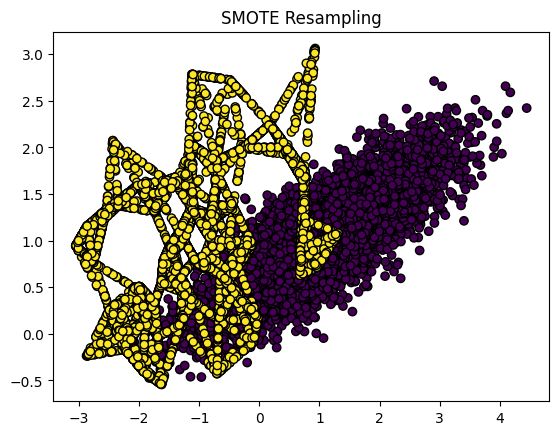


Accuracy: 0.91
Confusion Matrix:
[[1813  170]
 [   2   15]]


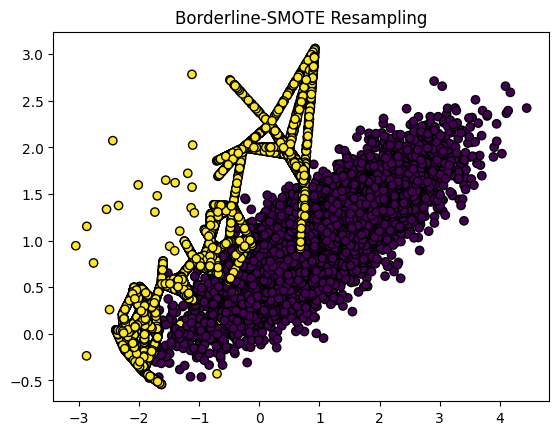


Accuracy: 0.96
Confusion Matrix:
[[1906   77]
 [   1   16]]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Loading dataset and preproccessing to comma seperated values format.
df = pd.read_csv(datasetPath, header=None, delimiter=',')

# Extracting features and labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Spliting into training and testing sets
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluating and plotting the results
def evaluateAndPlot(XResampled, yResampled, title):
    model = LogisticRegression(random_state=42)
    model.fit(XResampled, yResampled)

    # Making predictions on the test set
    yPred = model.predict(XTest)

    # Evaluating the models accuracy and doing the confusion matrix.
    accuracy = accuracy_score(yTest, yPred)
    cm = confusion_matrix(yTest, yPred)

    # Ploting the resampled data
    plt.scatter(XResampled[:, 0], XResampled[:, 1], c=yResampled, cmap='viridis', marker='o', edgecolors='k')
    plt.title(title)
    plt.show()

    # Printing the results
    print(f'\nAccuracy: {accuracy:.2f}')
    print('Confusion Matrix:')
    print(cm)

# Applying SMOTE
smote = SMOTE(random_state=42)
XResampledSmote, yResampledSmote = smote.fit_resample(XTrain, yTrain)
evaluateAndPlot(XResampledSmote, yResampledSmote, 'SMOTE Resampling')

# Applying Borderline-SMOTE
borderlineSmote = BorderlineSMOTE(random_state=42)
XResampledBorderline, yResampledBorderline = borderlineSmote.fit_resample(XTrain, yTrain)
evaluateAndPlot(XResampledBorderline, yResampledBorderline, 'Borderline-SMOTE Resampling')
